# Vostok Ice Core

This exercise comes from [The Physics Hypertextbook](https://physics.info/linear-regression/practice.shtml). Data is from the [Vostok - Isotope and Gas Data and Temperature Reconstruction](https://www.ncdc.noaa.gov/paleo-search/study/2453) by Petit, et. al. (1999).

    Petit, J.R., J. Jouzel, D. Raynaud, N.I. Barkov, J.M. Barnola, I. Basile, M. Bender, J. Chappellaz, J. Davis, G. Delaygue, M. Delmotte, V.M. Kotlyakov, M. Legrand, V. Lipenkov, C. Lorius, L. Pépin, C. Ritz, E. Saltzman, and M. Stievenard. 1999. Climate and atmospheric history of the past 420,000 years from the Vostok Ice Core, Antarctica. Nature 399:429-436.
    
From a deep ice core sampled in Antarctica, surface temperature, carbon dioxide, and dust could be measured as a function of time in the past. While other measurements were made as well (see the above reference), we will look at temperature and carbon dioxide. This [data set](https://raw.githubusercontent.com/atitus/STLinSTL/main/workshop2/04-applications/vostok.txt) includes the columns:

1. Age of air in years before present.
2. Temperature anomaly (difference in temperature from the present) in degrees celsius.
3. Carbon dioxide concentration in parts per million.

Here is a graph of temperature anomaly vs. carbon dioxide concentration.

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

In [5]:
# read the data file
df = pd.read_csv('vostok.txt', sep='\t')
df.head()

,Age of air (ybp),Temperature anomaly (deg. C),Carbon dioxide concentration (ppm)
0,2342,-1.21,284.700000
1,2374,-1.44,284.303333
2,2418,-0.73,283.906667
3,2460,-0.63,283.510000
4,2501,0.30,283.113333


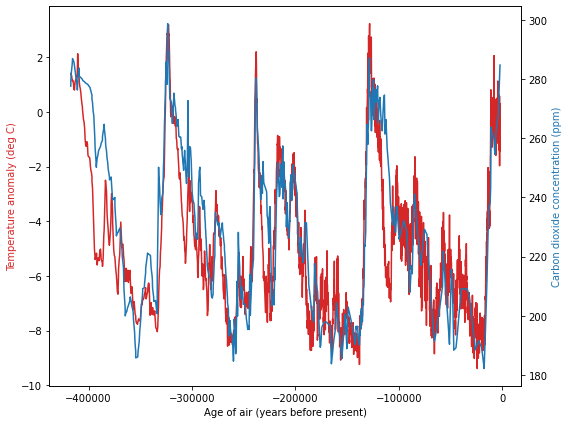

In [6]:
# define arrays for the data
xdata = -df['Age of air (ybp)'] #multiply by -1
ydata1 = df['Temperature anomaly (deg. C)']
ydata2 = df['Carbon dioxide concentration (ppm)']

fig, ax1 = plt.subplots(figsize=(8,6))

fig.title=('Temperature anomaly and carbon dioxide concentration as a function of time')
color = 'tab:red'
ax1.set_xlabel('Age of air (years before present)')

ax1.set_ylabel("Temperature anomaly (deg C)", color=color)
ax1.plot(xdata, ydata1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # create a second axis that shares attributes of the first axis

color = 'tab:blue'
ax2.set_ylabel('Carbon dioxide concentration (ppm)', color=color)
ax2.plot(xdata, ydata2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Plot Temperature Anomaly vs. Carbon Dioxide Concentration

It seems that temperature anomaly and carbon dioxide concentration might be related. Let's plot temperature anomaly vs. carbon dioxide concentration.

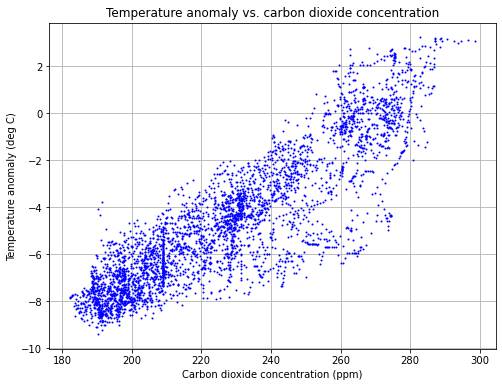

In [11]:
fig = plt.figure(figsize=(8,6))
plt.title("Temperature anomaly vs. carbon dioxide concentration")
plt.xlabel('Carbon dioxide concentration (ppm)')
plt.ylabel('Temperature anomaly (deg C)')
plt.grid(which='both', axis='both')
plt.plot(ydata2, ydata1, 'bo', markersize=1)
plt.show()

The data seems linear, so let's do a linear fit.

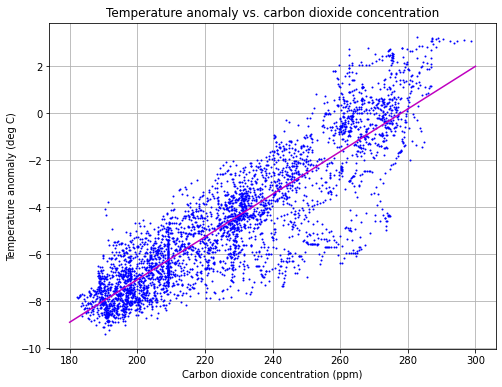

The best-fit function is y=mx + b where m=0.0908 and b=-25.2349.


In [15]:
# define the model function; this function returns y(x) for a given value of x and fit parameters
# the fit parameters are comma-delimited after the variable x
model = lambda x,m,b: m*x + b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters, with one value for each fit parameter
params, covariance = curve_fit(model, ydata2, ydata1, p0=guess)
m, b = params

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(180,300,100)
yfit = model(xfit, m, b)

# plot data and the best-fit line on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Temperature anomaly vs. carbon dioxide concentration")
plt.xlabel('Carbon dioxide concentration (ppm)')
plt.ylabel('Temperature anomaly (deg C)')
plt.grid(which='both', axis='both')
plt.plot(ydata2, ydata1, 'bo', markersize=1)
plt.plot(xfit,yfit, 'm-')
plt.show()

# print slope and intercept
print("The best-fit function is y=mx + b where m={:.4f} and b={:.4f}.".format(m,b))
